In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv("movie_metadata.csv")
pd.set_option("display.max.columns", None)
#df.isna().sum().sum() 2698 NaN
df.fillna(0, inplace = True)
#df.count()/df.shape[0] * 100
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,0,0.0,0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0


In [4]:
df_country = df[df["country"] == "USA"]
df_country.groupby(["budget", "num_user_for_reviews"]).mean()

num_critic_for_reviews    duration  \
budget      num_user_for_reviews                                       
0.0         0.0                                      0.0   75.000000   
            1.0                                      4.5  103.500000   
            2.0                                      0.0  105.000000   
            3.0                                     15.0   72.857143   
            4.0                                      8.0   90.500000   
...                                                  ...         ...   
250000000.0 3018.0                                 673.0  183.000000   
258000000.0 1902.0                                 392.0  156.000000   
260000000.0 387.0                                  324.0  100.000000   
263700000.0 738.0                                  462.0  132.000000   
300000000.0 1238.0                                 302.0  169.000000   

                                  director_facebook_likes  \
budget      num_user_for_reviews                            
0.0         0.0                                  5.750000   
            1.0                                 63.166667   
            2.0                                  0.000000   
            3.0                                 78.571429   
            4.0                                  4.000000   
...                                                   ...   
250000000.0 3018.0                               0.000000   
258000000.0 1902.0                               0.000000   
260000000.0 387.0                               15.000000   
263700000.0 738.0                              475.000000   
300000000.0 1238.0                             563.000000   

                                  actor_3_facebook_likes  \
budget      num_user_for_reviews                           
0.0         0.0                               311.250000   
            1.0                               166.666667   
            2.0                               241.500000   
            3.0                               165.857143   
            4.0                               179.500000   
...                                                  ...   
250000000.0 3018.0                           2000.000000   
258000000.0 1902.0                           4000.000000   
260000000.0 387.0                             284.000000   
263700000.0 738.0                             530.000000   
300000000.0 1238.0                           1000.000000   

                                  actor_1_facebook_likes         gross  \
budget      num_user_for_reviews                                         
0.0         0.0                               594.000000  1.976075e+04   
            1.0                              2004.666667  2.851667e+02   
            2.0                               353.500000  1.136205e+05   
            3.0                              1664.714286  1.002020e+05   
            4.0                               562.500000  0.000000e+00   
...                                                  ...           ...   
250000000.0 3018.0                          15000.000000  3.302491e+08   
258000000.0 1902.0                          24000.000000  3.365303e+08   
260000000.0 387.0                             799.000000  2.008073e+08   
263700000.0 738.0                             640.000000  7.305868e+07   
300000000.0 1238.0                          40000.000000  3.094042e+08   

                                  num_voted_users  cast_total_facebook_likes  \
budget      num_user_for_reviews                                               
0.0         0.0                         37.750000                1959.500000   
            1.0                         81.833333                2622.166667   
            2.0                        135.500000                1616.000000   
            3.0                        431.142857                2808.428571   
            4.0                        403.500000                1471.000000   

In [52]:
X1 = df_country["num_voted_users"]
Y1 = df_country["imdb_score"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, random_state= 42,test_size=0.3, shuffle=True)
X_train1 = X_train1.reshape(-1, 1)
y_train1 = y_train1.reshape(-1, 1)
model = LinearRegression().fit(X_train1, y_train1)
r_sq = model.score(X_train1, y_train1)
r_sq
model = LinearRegression().fit(X_test1, y_test1)
r_sq = model.score(X_test1, y_test1)
r_sq

<AxesSubplot:>

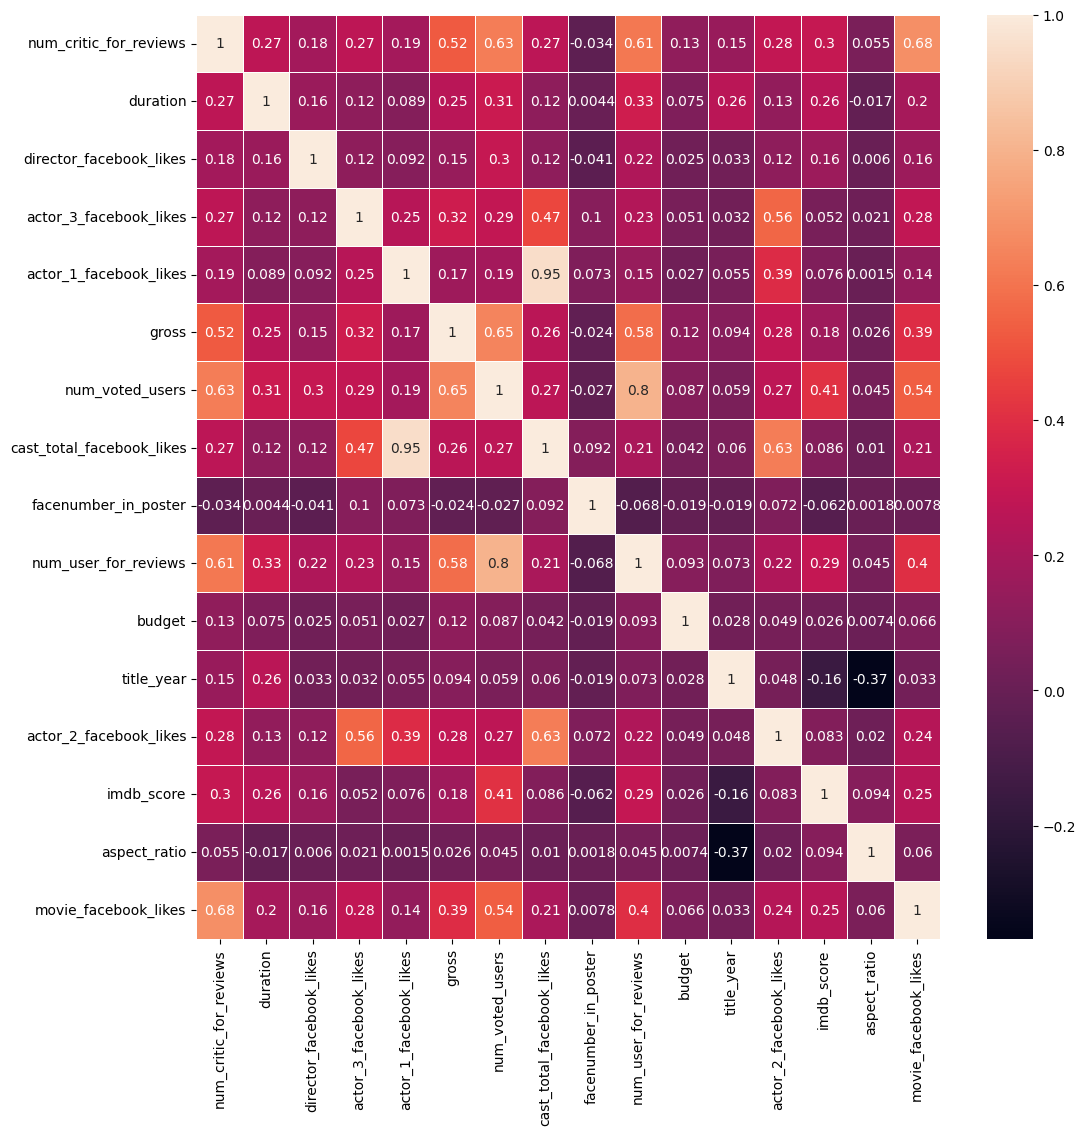

In [6]:
fig = plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, linewidth = .5)

In [7]:
#df.info()
df2 = df.select_dtypes(exclude=['object'])

voici l'exercice d'aujourd'hui:
Charger le dataset 'movie_metadata.csv'

Regarder s'il ya des valeurs nulles dans le dataset

Si oui, remplacer les valeurs nulles par des 0

Tracer la "heatmap" des correlations entre les colonnes

Identifier les colonnes qui sont soit des int64 et float64

Diviser le dataset en deux datasets plus petits (un de 70%, qu'on appelera "train" et un de 30% qu'on apelera "test" du dataset initial) avec la methode train_test_split

Choisir la colonne "imdb_score" comme target et toutes les autres comme features, et donc définir y_train, X_train, y_test et X_test

Utiliser le model linear_model.LinearRegression() de sklearn pour faire la régression linéaire

Définir le model:
- Donner X_train et y_train au model pour qu'il s'entraine
- Regarder le score du modèle pour X_train et y_train
- Regarder le score du modèle pour X_test et y_test

In [8]:
Y = df2["imdb_score"]
X = df2.drop("imdb_score", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state= 42,test_size=0.3, shuffle=True)

In [9]:
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
r_sq

0.29150894842283115

In [10]:
model = LinearRegression().fit(X_test, y_test)
r_sq = model.score(X_test, y_test)
r_sq

0.2737581369493981

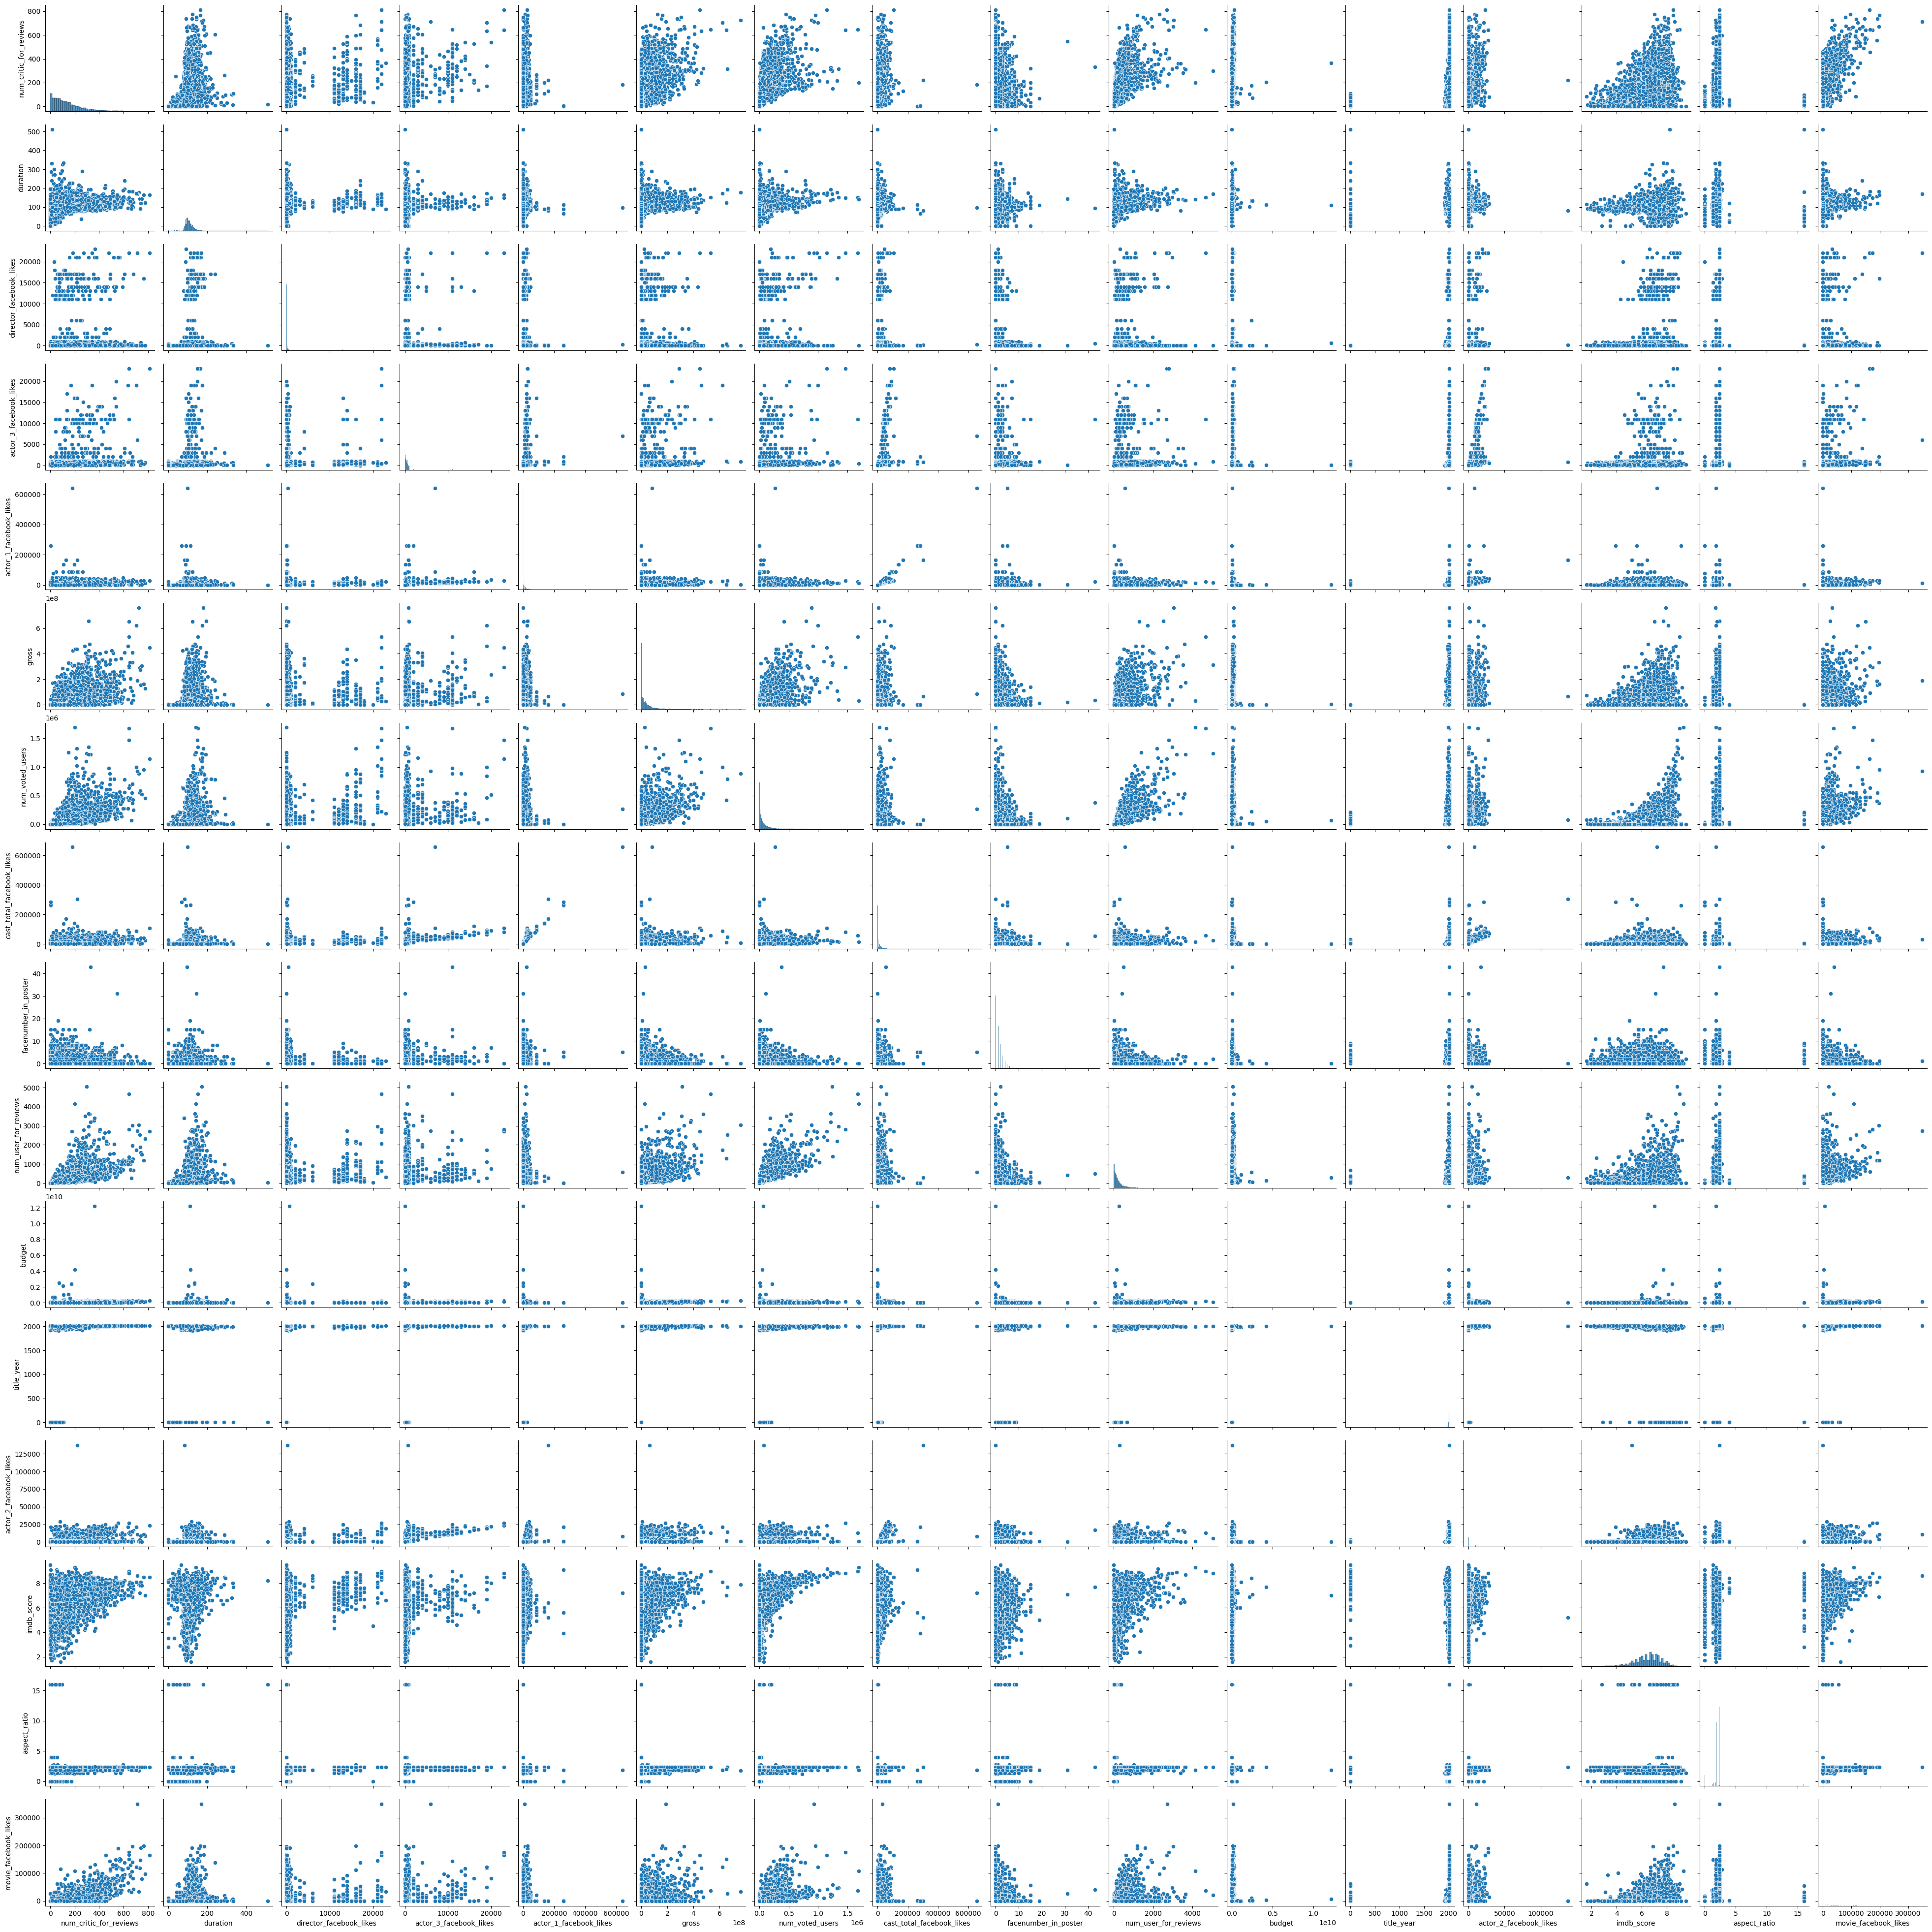

In [57]:
sns.pairplot(df)

In [11]:
prediction = model.predict(X_test)

In [12]:
bb = pd.DataFrame(y_test)

In [13]:
aa = pd.DataFrame(prediction)

In [20]:
aa.join(bb)

,0,imdb_score
0,6.030097,NaN
1,6.512233,NaN
2,6.536671,NaN
3,6.037842,NaN
4,6.369329,NaN
...,...,...
1508,7.204784,NaN
1509,6.108635,NaN
1510,6.260879,NaN
1511,6.494439,NaN


In [19]:
joinscore

,0,imdb_score
0,6.030097,NaN
1,6.512233,NaN
2,6.536671,NaN
3,6.037842,NaN
4,6.369329,NaN
...,...,...
1508,7.204784,NaN
1509,6.108635,NaN
1510,6.260879,NaN
1511,6.494439,NaN
